# Data Scientist Professional Practical Exam

### Company Background

Inn the Neighborhood is an online platform that allows people to rent out their properties for short stays. At the moment, only 2% of people who come to the site interested in renting out their homes start to use it.

The product manager would like to increase this. They want to develop an application to help people estimate how much they could earn renting out their living space. They hope that this would make people more likely to sign up.



### Customer Question

The product manager would like to know:
- Can you develop a way to predict how much someone could earn from renting their property that could power the application?




### Success Criteria

They want to avoid estimating prices that are more than 25 dollars off of the actual price, as this may discourage people.


### Dataset

The data you will use for this analysis can be accessed here: `"data/rentals.csv"`

## Importing and cleaning the dataset

In [1]:
# Use this cell to begin, and add as many cells as you need to complete your analysis!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score, mean_squared_error


sns.set_style("darkgrid")

In [2]:
rentals_df = pd.read_csv('data/rentals.csv')
print(rentals_df.shape)
rentals_df.head()

(8111, 9)


,id,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
0,958,37.76931,-122.43386,Apartment,Entire home/apt,1.0,1.0,1,$170.00
1,3850,37.75402,-122.45805,House,Private room,1.0,1.0,1,$99.00
2,5858,37.74511,-122.42102,Apartment,Entire home/apt,1.0,2.0,30,$235.00
3,7918,37.76669,-122.45250,Apartment,Private room,4.0,1.0,32,$65.00
4,8142,37.76487,-122.45183,Apartment,Private room,4.0,1.0,32,$65.00


In [3]:
# Check dtypes and null values
rentals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8111 entries, 0 to 8110
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              8111 non-null   int64  
 1   latitude        8111 non-null   float64
 2   longitude       8111 non-null   float64
 3   property_type   8111 non-null   object 
 4   room_type       8111 non-null   object 
 5   bathrooms       8099 non-null   float64
 6   bedrooms        8107 non-null   float64
 7   minimum_nights  8111 non-null   int64  
 8   price           8111 non-null   object 
dtypes: float64(4), int64(2), object(3)
memory usage: 570.4+ KB


### Checking null bathroom values

In [4]:
rentals_df[rentals_df.bathrooms.isna()]

,id,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
139,144978,37.79336,-122.42506,Apartment,Private room,NaN,1.0,30,$56.00
181,229240,37.79341,-122.40340,Hostel,Shared room,NaN,1.0,1,$45.00
196,259621,37.79470,-122.40374,Hostel,Shared room,NaN,1.0,1,$45.00
197,259622,37.79441,-122.40473,Hostel,Shared room,NaN,1.0,1,$45.00
267,430692,37.75906,-122.40761,Apartment,Private room,NaN,1.0,31,$68.00
352,596042,37.79384,-122.42436,Apartment,Private room,NaN,1.0,30,$63.00
434,785901,37.79313,-122.40443,Hostel,Shared room,NaN,1.0,1,$45.00
435,786492,37.79421,-122.40310,Hostel,Shared room,NaN,1.0,1,$45.00
436,786506,37.79260,-122.40339,Hostel,Shared room,NaN,1.0,1,$45.00
539,1031899,37.74833,-122.42621,Apartment,Entire home/apt,NaN,1.0,30,$127.00


In [5]:
rentals_df.bathrooms.unique()

array([ 1. ,  4. ,  1.5,  2. ,  3. ,  0. ,  2.5,  3.5,  nan,  0.5,  6.5,
       10. ,  4.5, 14. ,  8. ,  5. ,  6. ,  7. ])

### Checking null bedroom values

In [6]:
rentals_df[rentals_df.bedrooms.isna()]

,id,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
269,431862,37.78321,-122.41969,Apartment,Entire home/apt,1.0,NaN,30,$124.00
6301,32183178,37.78883,-122.48640,House,Entire home/apt,3.5,NaN,30,$650.00
7786,38329898,37.78347,-122.41669,Apartment,Entire home/apt,1.0,NaN,30,$75.00
7840,38550933,37.78979,-122.41994,Apartment,Entire home/apt,1.0,NaN,30,$108.00


In [7]:
rentals_df.bedrooms.unique()

array([ 1.,  2.,  0.,  3.,  4., nan,  5.,  6., 14.,  7.,  8.])

### Checking other unique values

In [8]:
rentals_df.property_type.unique()

array(['Apartment', 'House', 'Condominium', 'Townhouse', 'Loft',
       'Guest suite', 'Cottage', 'Hostel', 'Guesthouse',
       'Serviced apartment', 'Bungalow', 'Bed and breakfast', 'Hotel',
       'Boutique hotel', 'Other', 'Tiny house', 'Resort', 'Villa',
       'Aparthotel', 'Castle', 'Camper/RV', 'In-law', 'Earth house',
       'Cabin', 'Dome house', 'Hut'], dtype=object)

In [9]:
rentals_df.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

### Data validation

The dataset has 8111 rows and 9 columns, 16 missing values.
- id: Int, no null value. 
- latitude: Float, no missing values.
- longitude: Float, no missing values.
- property_type: object, no missing values. Needs to change to categorical type.
- room_type: object, no null value. Needs to change to categorical type.
- bathrooms: float64, 12 missing values. Keep as float to count half baths and fill missing values with 0
- bedrooms: float64, 4 missing values. Remove missing values and change to int.
- minimum_nights: int, no missing values. Remove values above 60 days.
- price: object. replace "$" and "," and change to float. Remove prices = 0.

In [10]:
# Fill bathrooms Na with 0
rentals_df.bathrooms = rentals_df.bathrooms.fillna(0)

# Drop Na bedrooms
rentals_df = rentals_df.dropna(subset = ['bedrooms'])

# Change the price string to convert to float.
rentals_df.price = rentals_df.price.str.replace('$','')
rentals_df.price = rentals_df.price.str.replace(',','')

#### Checking minimum nights

In [11]:
rentals_df.minimum_nights.unique()

array([        1,        30,        32,         6,         3,        90,
               2,         5,         4,        60,        10,       365,
              80,        45,         7,        29,        31,         9,
              14,       183,       200,       180,       120,        58,
             360,        50,        59,        70,        16,        75,
             110,        13,        55,       140,        28,      1125,
              85,        21,        18, 100000000,        11,       188,
            1000,        40,        65,       100,        12,        38,
               8,        25,        15,       150,        33])

In [12]:
# remove wrong minimum_nights
rentals_df = rentals_df[rentals_df.minimum_nights < 30]

In [13]:
len(rentals_df)

4528

#### Changing data types

In [14]:
# Correct data types

rentals_df['property_type'] = rentals_df['property_type'].astype('category')
rentals_df['room_type'] = rentals_df['room_type'].astype('category')
rentals_df['bathrooms'] = rentals_df['bathrooms'].astype('float')
rentals_df['bedrooms'] = rentals_df['bedrooms'].astype('int')
rentals_df['minimum_nights'] = rentals_df['minimum_nights'].astype('int')
rentals_df['price'] = rentals_df['price'].astype('float')

assert rentals_df.property_type.dtype == 'category'
assert rentals_df.room_type.dtype == 'category'
assert rentals_df.bathrooms.dtype == 'float'
assert rentals_df.bedrooms.dtype == 'int'
assert rentals_df.minimum_nights.dtype == 'int'
assert rentals_df.price.dtype == 'float'

In [15]:
rentals_df.price.describe()

count     4528.000000
mean       263.161661
std        479.444582
min          0.000000
25%        105.000000
50%        169.000000
75%        280.000000
max      10000.000000
Name: price, dtype: float64

In [16]:
# Remove the wrong pricing
rentals_df = rentals_df[~(rentals_df.price == 0)]

## Exploratory analysis

### Overview

I have investigated the target variable and features of the properties, and the relationship between target variable and features. After the analysis,I decided to apply the following changes to enable modeling:

- price: use power transformation to approximate to a normal.
- Create a new ordinal variable from minimum_nights variable.
- Change latitude and longitude to be 0 centered and 10x bigger.

### Target variable: Price

In [17]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'box-cox')

rentals_df['price_normed'] = scaler.fit_transform(rentals_df[['price']]) 

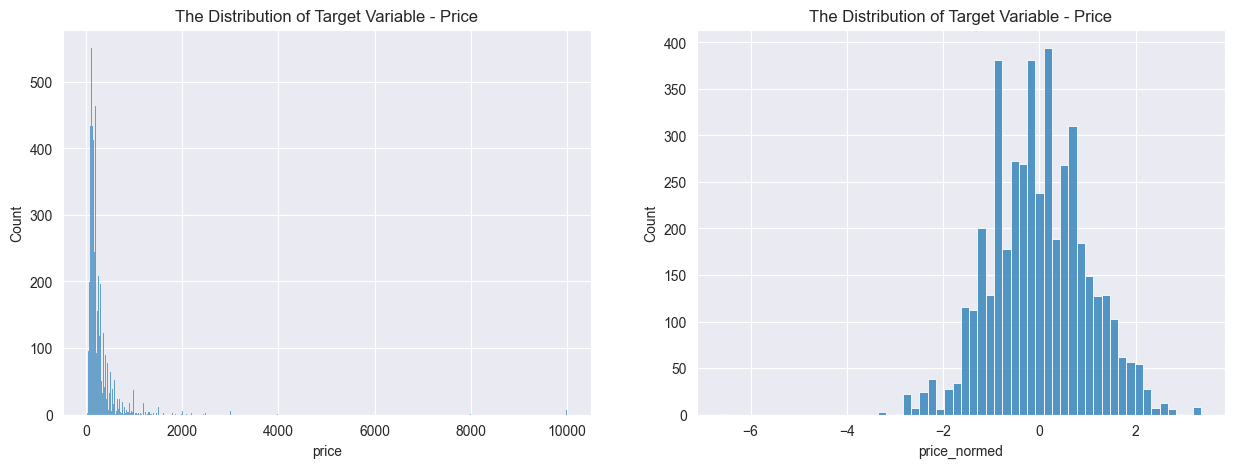

In [18]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.histplot(rentals_df['price'],ax=axes[0]).set(title='The Distribution of Target Variable - Price')
sns.histplot(rentals_df['price_normed'],ax=axes[1]).set(title='The Distribution of Target Variable - Price');

Text(0.5, 1.0, 'Normalized Rental Price Boxplot')

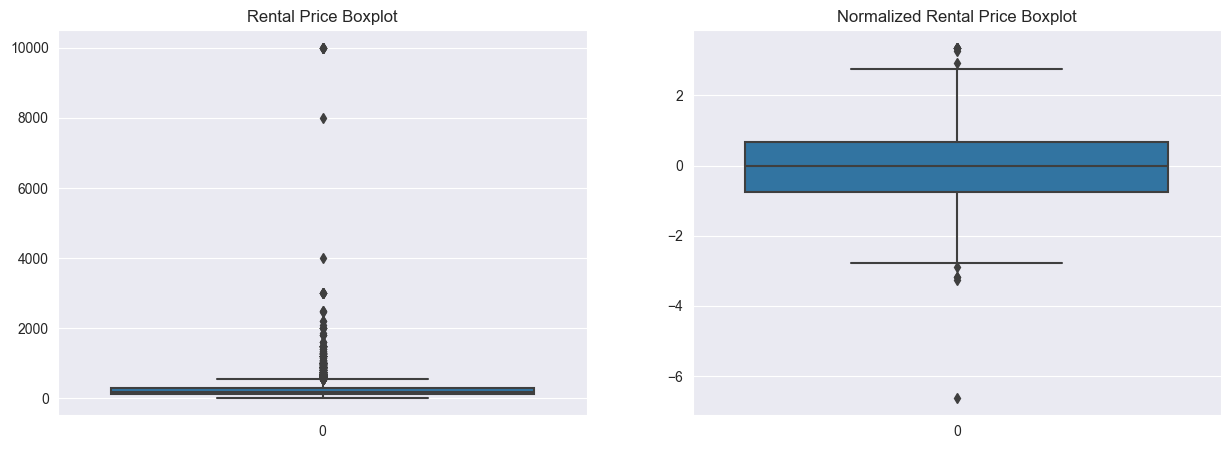

In [19]:
fig, axes = plt.subplots(1,2,figsize=(15,5))

sns.boxplot(rentals_df['price'], ax = axes[0]).set_title('Rental Price Boxplot')
sns.boxplot(rentals_df['price_normed'], ax = axes[1]).set_title('Normalized Rental Price Boxplot')

### Minimum nights

In [20]:
np.arange(0,8,0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9])

([<matplotlib.axis.YTick at 0x7f6e6d1a44f0>,
 [Text(0, 1.0, '$10'),
  Text(0, 1.5, ''),
  Text(0, 2.0, '$100'),
  Text(0, 2.5, ''),
  Text(0, 3.0, '$1000'),
  Text(0, 3.5, ''),
  Text(0, 4.0, '$10000')])

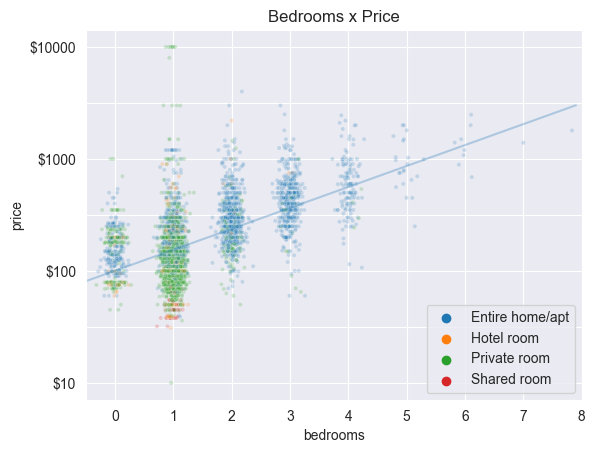

In [21]:
from sklearn.linear_model import LinearRegression

def jitter(values, std):
    return values + np.random.normal(0,std,len(values))
sns.scatterplot(y=np.log10(rentals_df['price']),
                x=jitter(rentals_df['bedrooms'],0.1),
                marker = '.',
                alpha = 0.2,
                hue = rentals_df['room_type'],
               ).set(title='Bedrooms x Price')
plt.xlim(-0.5,8)

lr_model = LinearRegression()
lr_model.fit(rentals_df[['bedrooms']], 
             np.log10(rentals_df['price']))

y_pred = lr_model.predict(np.arange(-1,8,0.1).reshape(-1,1))

sns.lineplot(x = np.arange(-1,8,0.1),
            y = y_pred,
            alpha = 0.3)
plt.yticks(ticks = [1,1.5,2,2.5,3,3.5,4],labels = ['$10','','$100','','$1000','','$10000'])

In [22]:
rentals_df.pivot_table(index = 'property_type', columns='room_type', values = 'id', aggfunc='count')

room_type,Entire home/apt,Hotel room,Private room,Shared room
property_type,,,,
Aparthotel,3,2,17,0
Apartment,667,0,424,4
Bed and breakfast,0,12,17,14
Boutique hotel,15,60,189,0
Bungalow,8,0,2,1
Cabin,1,0,1,0
Castle,0,0,4,0
Condominium,341,0,193,1
Cottage,7,0,2,0


(0.0, 60.0)

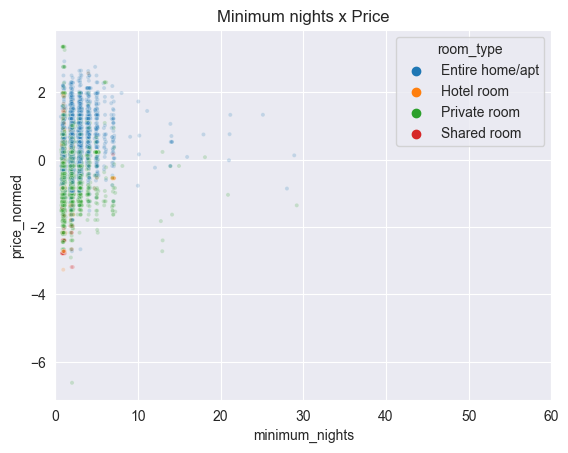

In [23]:
def jitter(values, std):
    return values + np.random.normal(0,std,len(values))
sns.scatterplot(y=rentals_df['price_normed'],
                x=jitter(rentals_df['minimum_nights'],0.1),
                marker = '.',
                alpha = 0.2,
                hue = rentals_df['room_type'],
                
               ).set(title='Minimum nights x Price')
plt.xlim(0,60)

### Latitude/longitude

In [24]:
latitude_mid = (rentals_df.latitude.max() + rentals_df.latitude.min()) / 2
longitude_mid = (rentals_df.longitude.max() + rentals_df.longitude.min()) / 2

In [25]:
rentals_df['latitude'] = (rentals_df.latitude -latitude_mid)*10
rentals_df['longitude'] = (rentals_df.longitude -longitude_mid)*10

### Categorical variables: Property type, room type
#### Property types

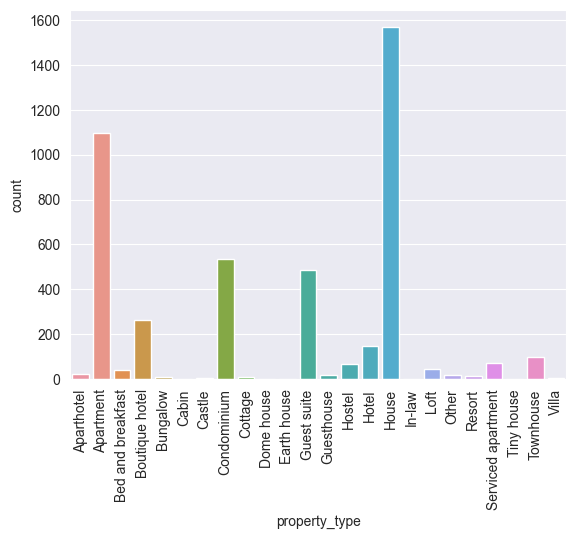

In [26]:
sns.countplot(data = rentals_df, x = 'property_type')
plt.xticks(rotation = 90)
plt.show()

Some property types has almost no samples, making it harder for the regression model to adjust using the property type.

I did some analysis on how the lack of samples did affect the predictions and created another column (adj_property_type) with less types.

Each category with less than 100 samples was mapped into the ones with the closest slope (MSE) compared to the nearby property types.

In [27]:
property_counts = rentals_df['property_type'].value_counts()
property_counts

House                 1567
Apartment             1095
Condominium            535
Guest suite            485
Boutique hotel         264
Hotel                  147
Townhouse               97
Serviced apartment      71
Hostel                  67
Loft                    46
Bed and breakfast       43
Aparthotel              22
Guesthouse              20
Other                   18
Resort                  13
Bungalow                11
Cottage                  9
Villa                    6
Castle                   4
Cabin                    2
Tiny house               2
Earth house              1
Dome house               1
In-law                   1
Name: property_type, dtype: int64

#### Adjusting the property types

We will eliminate any property type with less than 100 samples and find the best fit (best MSE) to the linear regression of bedrooms x price_normed.

To check only the properties in the same region, we will only check within a margin from the tested dataset.

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import math


def compare_nearby(df, tested_column, possible_columns, margin = 0.002):
    
    tested_df = df[df.property_type == tested_column]
    regions = []
    
    for index, value in tested_df.iterrows():
        regions.append(df[(df.latitude > value.latitude-margin) &
                      (df.latitude < value.latitude+margin) &
                      (df.longitude > value.longitude-margin) &
                      (df.longitude < value.longitude+margin)])

    target_df = pd.concat(regions)
    
    best_column = None
    best_score = 1000
    for column in possible_columns:
        target_property = target_df[target_df.property_type == column]
        if len(target_property) > 1:
            lr_model = LinearRegression()
            lr_model.fit(target_property[['bedrooms']], 
                         target_property[['price_normed']])
            y_preds = lr_model.predict(tested_df[['bedrooms']])
            MSE = mean_squared_error(tested_df['price_normed'], y_preds)
            if MSE < best_score:
                best_score = MSE
                best_column = column
    
    return best_column
    

In [29]:
changes = {}
base_types = ['Apartment', 'House', 'Condominium', 'Guest suite', 'Boutique hotel',  'Townhouse','Hotel']
tested_types = [ 'Serviced apartment', 'Hostel','Loft', 'Bed and breakfast', 'Aparthotel', 'Guesthouse',
                'Other', 'Bungalow', 'Resort', 'Cottage', 'Villa', 'Castle', 'Cabin', 'Tiny house',
                'Earth house', 'Dome house', 'In-law']

for base_type in base_types:
    changes[base_type] = base_type

for tested_type in tested_types:
    target = compare_nearby(rentals_df, tested_type, base_types, margin = 0.05)
    print(tested_type, '-->',target)
    changes[tested_type] = target

Serviced apartment --> Townhouse
Hostel --> Townhouse
Loft --> Hotel
Bed and breakfast --> Townhouse
Aparthotel --> Boutique hotel
Guesthouse --> Apartment
Other --> Apartment
Bungalow --> Townhouse
Resort --> Condominium
Cottage --> Guest suite
Villa --> Condominium
Castle --> House
Cabin --> Guest suite
Tiny house --> Apartment
Earth house --> Condominium
Dome house --> House
In-law --> Apartment


In [30]:
rentals_df['adj_property_type'] = rentals_df.property_type.apply(lambda s: changes[s])

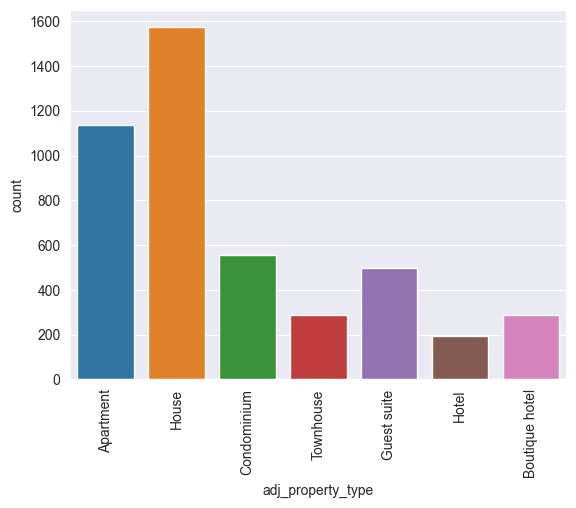

In [31]:
sns.countplot(data = rentals_df, x = 'adj_property_type')
plt.xticks(rotation = 90)
plt.show()

#### Room type

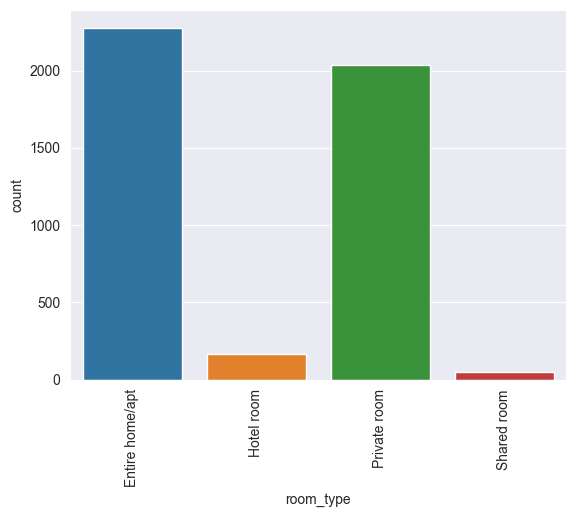

In [32]:
sns.countplot(data = rentals_df, x = 'room_type')
plt.xticks(rotation = 90)
plt.show()

The most common room_type is the "Entire home/apt"

### Relationship between property_type, room type and price.

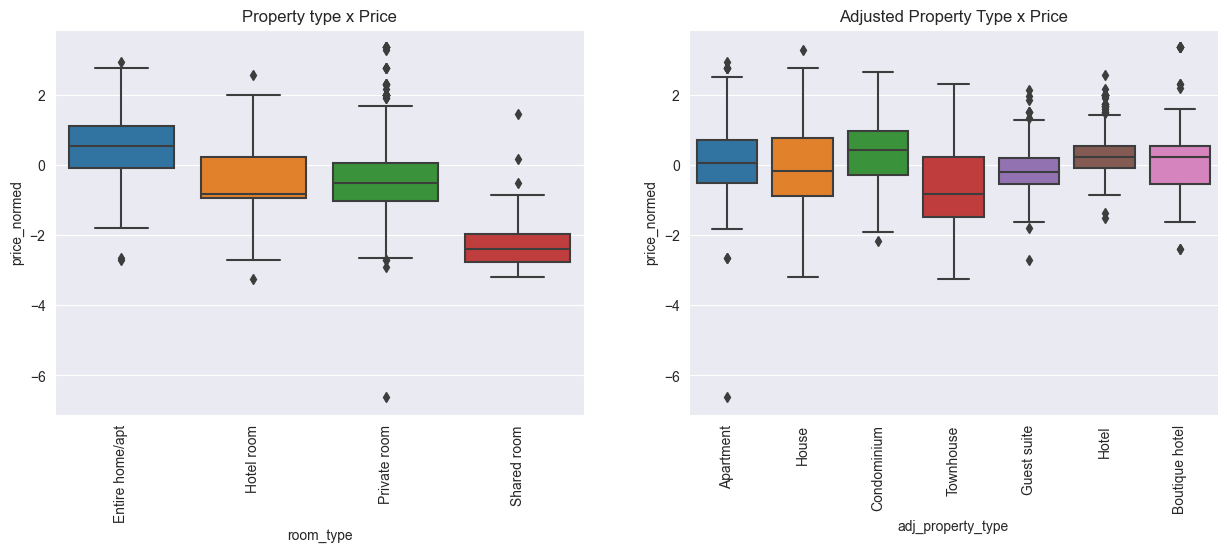

In [33]:
fig, axes = plt.subplots(1,2,figsize=(15,5))

sns.boxplot(data = rentals_df, x = 'room_type', y='price_normed', ax = axes[0]).set_title("Property type x Price")
sns.boxplot(data = rentals_df, x = 'adj_property_type', y='price_normed', ax = axes[1]).set_title("Adjusted Property Type x Price")
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90);

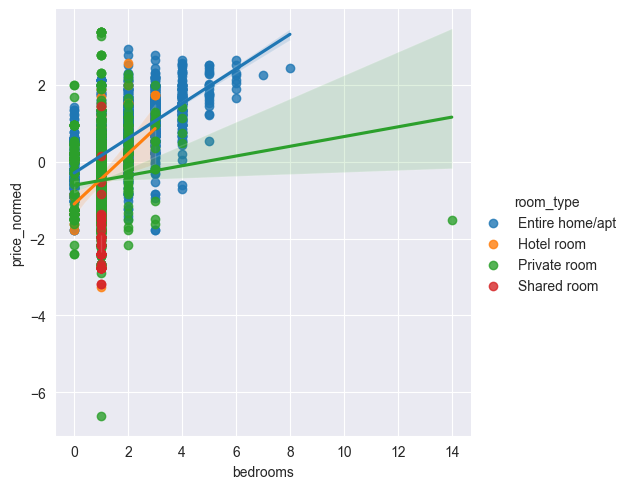

In [34]:
sns.lmplot(data = rentals_df, hue = 'room_type', x = 'bedrooms', y='price_normed')
plt.show()

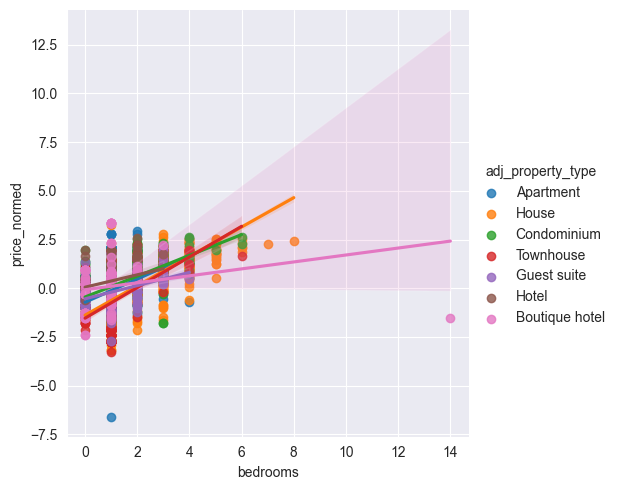

In [35]:
sns.lmplot(data = rentals_df, hue = 'adj_property_type', x = 'bedrooms', y='price_normed')
plt.show()

### Location x price EDA

#### Overview

In [36]:
sns.set_style('white')

In [37]:
def remove_outliers(df, multiplier = 1.5):
    """
    Removes outliers by IQR*multiplier criteria on the price_normed column
    
    Args:
    df: Dataframe with a price_normed column
    
    Returns
    Pandas DataFrame: Dataframe without outliers
    """
    
    iqr = df.price_normed.quantile(0.75) - df.price_normed.quantile(0.25)
    lower_bound = df.price_normed.quantile(0.25) - multiplier*iqr
    upper_bound = df.price_normed.quantile(0.75) + multiplier*iqr
    new_df = df[(df.price_normed > lower_bound) &
                (df.price_normed < upper_bound)]
    
    return new_df

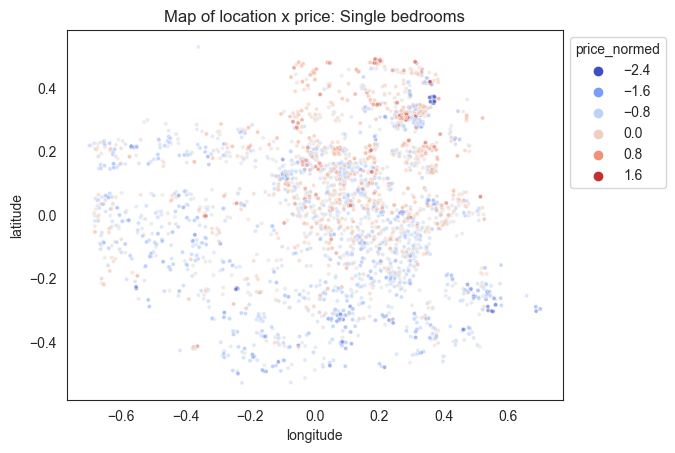

In [38]:
# Checking rental prices x locations
data_ = rentals_df[(rentals_df.bedrooms == 1)]
data_ = remove_outliers(data_)

ax = sns.scatterplot(data = data_, 
                    x = 'longitude', 
                    y = 'latitude', 
                    hue='price_normed',
                    alpha = 0.5,
                    marker = '.',
                    palette = "coolwarm")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title("Map of location x price: Single bedrooms")
plt.show()

I checked the location influence on price, and the median price of a single room close to the property has a strong influence on the final price.

To map the regions, we will divide the map in cuts of 0.04 latitude and longitude and check the median price near each point.

### Region mapping

#### Useful functions

In [39]:
def get_region_median(regions_df, source_df, distance = 0.01):
    """
    Get the median of the area surrounding the coordinates in the regions_df
    
    Args:
    regions_df(dataframe): Dataframe with latitude and longitude columns.
    
    source_df(dataframe): Dataframe with latitude, longitude and price_normed to get the median from.
    
    distance(float): distance from the coordinates to be checked.
    
    Returns:
    Array: Array with size len(regions_df) with the median price_normed of each area 
    surrounding the coordinates at regions_df
    """
    new_medians = regions_df.apply(lambda x: 
                                  source_df[(source_df.latitude >= x.latitude-distance) &
                                        (source_df.latitude <= x.latitude+distance) &
                                        (source_df.longitude >= x.longitude-distance) &
                                        (source_df.longitude <= x.longitude+distance)].price_normed.median(),
                                  axis = 1)
    return new_medians

In [40]:
def check_close_values(regions_df, test_df, target, distance = 0.01, kind = 'mean', min_samples = 5):
    
    """
    Get the average zone values from the sample_df
    
    Args:
    sample_df(Pandas Dataframe): Dataframe with 'latitude', 'longitude' and target columns to use
    as reference for the average calculation.
    
    test_df(Pandas Dataframe): Dataframe with 'latitude' and 'longitude' columns to be tested. 
    
    target(string): Target column.
    
    distance(float, optional): Distance of the rectangle to analize. If no values are found in the first region, 
    repeats the process with n*distance with n = number of iterations.
    
    kind(String): mean or median
    
    Returns:
    list: List of averages with length len(test_df).
    """
    
    averages = []
    for index, row in test_df.iterrows():
        average = np.nan
        min_lat = row.latitude - distance
        max_lat = row.latitude + distance
        min_lon = row.longitude - distance
        max_lon = row.longitude + distance
        while np.isnan(average):
            df_ = regions_df[(regions_df.latitude > min_lat) &
                            (regions_df.latitude < max_lat) &
                            (regions_df.longitude > min_lon) &
                            (regions_df.longitude < max_lon)]
            if kind == 'mean':
                average = df_[target].mean()
            elif kind == 'median':
                average = df_[target].median()
            else:
                raise Exception("kind must be mean or median")
                
            if len(df_) < min_samples:
                min_lat = min_lat - distance
                max_lat = max_lat + distance
                min_lon = min_lon - distance
                max_lon = max_lon + distance
            else:
                break
        averages.append(average)
    return averages

In [41]:
def check_single_value(regions_df, test_coord, target, distance = 0.01, kind = 'mean'):
    
    """
    Get the average zone values from the sample_df
    
    Args:
    regions_df(Pandas Dataframe): Dataframe with 'latitude', 'longitude' and target columns to use
    as reference for the average calculation.
    
    test_coord(Pandas Dataframe): Dataframe with a single row and 'latitude' and 'longitude' columns to be tested. 
    
    target(string): Target column.
    
    distance(float, optional): Distance of the rectangle to analize. If no values are found in the first region, 
    repeats the process with n*distance with n = number of iterations.
    
    kind(String): mean or median
    
    Returns:
    list: List of averages with length len(test_df).
    """
    
    averages = []
    average = np.nan
    min_lat = test_coord.latitude - distance
    max_lat = test_coord.latitude + distance
    min_lon = test_coord.longitude - distance
    max_lon = test_coord.longitude + distance
    iterations = 1
    while np.isnan(average):
        df_ = regions_df[(regions_df.latitude > min_lat) &
                        (regions_df.latitude < max_lat) &
                        (regions_df.longitude > min_lon) &
                        (regions_df.longitude < max_lon)]
        
        if kind == 'mean':
            average = df_[target].mean()
        elif kind == 'median':
            average = df_[target].median()
        else:
            raise Exception("kind must be mean or median")
        if np.isnan(average):
            if iterations > 50:
                return 0
            min_lat = min_lat - distance
            max_lat = max_lat + distance
            min_lon = min_lon - distance
            max_lon = max_lon + distance
            iterations += 1
        else:
            break
    return average

In [42]:
# Create a mapping of several coordinates
from itertools import product

regions = pd.DataFrame(columns=['latitude', 'longitude'])
regions_list = product(np.arange(-0.6,0.6,0.02),np.arange(-0.8,0.8,0.02))
for lat, long in regions_list:
    regions.loc[len(regions)] = [lat,long]

#### Single bedroom price mapping

For a visual understanding of the region mapping, we will make an example of the single bedroom median for our dataset.

As this mapping uses the whole dataset, **we will have to re-create it after separating the train/test datasets**.

In [43]:
#Single bedroom price median in each region

data_ = rentals_df

regions['single_bedroom_median'] = get_region_median(regions,data_)

In [44]:
scaler.inverse_transform([[-1.5],[0],[1.5],[3]])

array([[  69.40561492],
       [ 169.54019576],
       [ 587.53973458],
       [4602.32246849]])

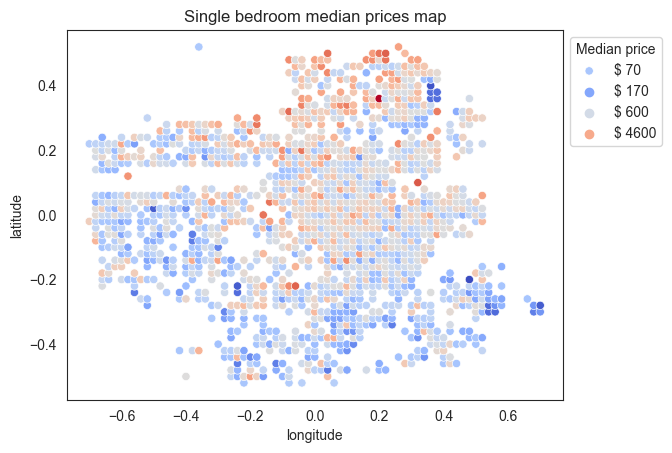

In [45]:
sns.set_style('white')
ax = sns.scatterplot(data = regions, 
                    x = 'longitude', 
                    y = 'latitude', 
                    hue='single_bedroom_median',
                    palette = "coolwarm")
plt.title('Single bedroom median prices map')
plt.legend(title='Median price', labels=['$ 70', '$ 170','$ 600','$ 4600'])
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

#### Density mapping

In [46]:
regions['density'] = regions.apply(lambda x: 
                                         len(rentals_df[(rentals_df.latitude > x.latitude - 0.04) &
                                                       (rentals_df.latitude < x.latitude + 0.04) &
                                                       (rentals_df.longitude > x.longitude - 0.04) &
                                                       (rentals_df.longitude < x.longitude + 0.04)]
                                            ), axis = 1)
regions['density'] = regions.density.apply(lambda x:
                                        0 if x == 0
                                        else( 1 if x < 50
                                            else( 2 if x < 120
                                                else 3)))

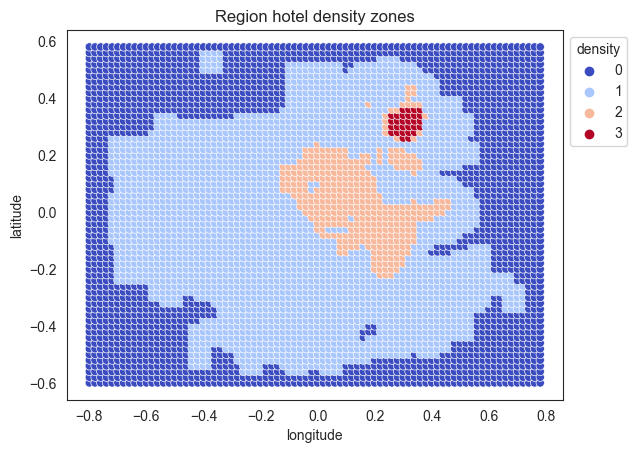

In [47]:
ax = sns.scatterplot(data = regions, 
                    x = 'longitude', 
                    y = 'latitude', 
                    hue='density',
                    palette = "coolwarm")
plt.title('Region hotel density zones')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [48]:
rentals_df['density_region'] = rentals_df.apply(lambda x: 
                                          check_single_value(regions, x, "density"), 
                                          axis = 1)

## Prepare Data for Modelling

To enable modelling, we chose id,latitude, longitude, adj_property_type, room_type, bathrooms, bedrooms, minimum_nights as features and price_normed as target variable. I also have made the following changes:

- Convert the categorical variables into numeric features
- Split the data into a training set and a test set
- Create region mappings using the training set
- Remove the price feature from X_train and X_test

Predicting the price is a regression problem in machine learning. I am choosing the Linear Regression model because we can see strong to moderate relationship between some features and target variable. The comparison model I am choosing is the Gradient Boosting Regressor model because it is easy to interpret and it generally provides better accuracy.

For the evaluation, I am choosing R squared and RMSE (Root Mean Squared Error) to evaluate the model. R squared measures how well the model fits dependent variables (i.e. features). RMSE measures how much your predicted results deviate from the actual number.

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



labelencoder_property = LabelEncoder()
labelencoder_room = LabelEncoder()

columns = ['id','latitude', 'longitude', 'adj_property_type', 
           'room_type', 'bathrooms', 'bedrooms', 'density_region', 
           'minimum_nights', 'price_normed'] # The price column will be removed after mapping the regions.

X_with_price = rentals_df[columns] # Features
X_with_price.adj_property_type = labelencoder_property.fit_transform(X_with_price.adj_property_type)
X_with_price.room_type = labelencoder_room.fit_transform(X_with_price.room_type)


y_normed = rentals_df[['price_normed']]  # Target variable

In [50]:
# Generate the training and testing sets.

X_train_with_price , X_test_with_price , y_train_normed , y_test_normed = train_test_split(X_with_price , y_normed , test_size = 0.30,random_state =42)

### Generate the medium price regions using the train set

In [51]:
# Generate regions by standard deviation and density

data_ = X_train_with_price[(X_train_with_price.bedrooms == 1)]
regions['single_bedroom_median'] = get_region_median(regions,data_)

# Average price of each property type in each region
for property_type in X_train_with_price.adj_property_type.unique():
    print("Checking property type", property_type)
    
    data_ = X_train_with_price[(X_train_with_price.adj_property_type == property_type) &
                               (X_train_with_price.bedrooms == 1)]
    regions["prop_{:.0f}".format(property_type)] = get_region_median(regions,data_)
print("Done checking property types")

# Average price of each property type in each region
for room_type in X_train_with_price.room_type.unique():
    print("Checking room type", room_type)
    
    data_ = X_train_with_price[(X_train_with_price.room_type == room_type) &
                               (X_train_with_price.bedrooms == 1)]
    regions["room_{:.0f}".format(room_type)] = get_region_median(regions,data_)
print("Done checking room types")

Checking property type 5
Checking property type 3
Checking property type 1
Checking property type 2
Checking property type 0
Checking property type 4
Checking property type 6
Done checking property types
Checking room type 0
Checking room type 2
Checking room type 1
Checking room type 3
Done checking room types


In [52]:
# Drop prices from the train and test sets
# The test prices were not used to calculate the regions to avoid 
# using the answer as part of the solution

X_train = X_train_with_price.drop(columns = ['price_normed'])
X_test = X_test_with_price.drop(columns = ['price_normed']) 

In [53]:
# Adding nearby single bedroom median price
X_train['nearby_single_bedroom_price'] = X_train.apply(lambda x: 
                                                      check_single_value(regions, x, "single_bedroom_median"), 
                                                      axis = 1)
X_test['nearby_single_bedroom_price'] = X_test.apply(lambda x: 
                                                      check_single_value(regions, x, "single_bedroom_median"), 
                                                      axis = 1)

X_train['nearby_property_type_price'] = X_train.apply(lambda x: 
                                                      check_single_value(regions, x,"prop_{:.0f}".format(x.adj_property_type)), 
                                                      axis = 1)
X_test['nearby_property_type_price'] = X_test.apply(lambda x: 
                                                      check_single_value(regions, x, "prop_{:.0f}".format(x.adj_property_type)), 
                                                      axis = 1)

X_train['nearby_room_type_price'] = X_train.apply(lambda x: 
                                                      check_single_value(regions, x, "room_{:.0f}".format(x.room_type)), 
                                                      axis = 1)
X_test['nearby_room_type_price'] = X_test.apply(lambda x: 
                                                      check_single_value(regions, x, "room_{:.0f}".format(x.room_type)), 
                                                      axis = 1)

### Base model - Linear regression

In [54]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train,y_train_normed)

LinearRegression()

In [55]:
y_pred_normed = lr_model.predict(X_test)


print('Linear Regression r2_score: ',round(r2_score(y_test_normed,y_pred_normed),2))
print('Linear Regression Root Mean Squared Error: ',round(np.sqrt(mean_squared_error(y_test_normed,y_pred_normed)),2))

y_test = scaler.inverse_transform(y_test_normed)
y_pred = scaler.inverse_transform(y_pred_normed)

lr_difference = (y_pred - y_test)

print('\nLinear Regression predictions:')
print("Within $25: {}".format(len(lr_difference[(lr_difference <= 25) & (lr_difference >= -25)])))
print("Total:      {}".format(len(lr_difference)))
print("Percentage: {:.1f}%".format(len(lr_difference[(lr_difference <= 25) & (lr_difference >= -25)])/len(lr_difference)*100))

Linear Regression r2_score:  0.55
Linear Regression Root Mean Squared Error:  0.65

Linear Regression predictions:
Within $25: 491
Total:      1359
Percentage: 36.1%


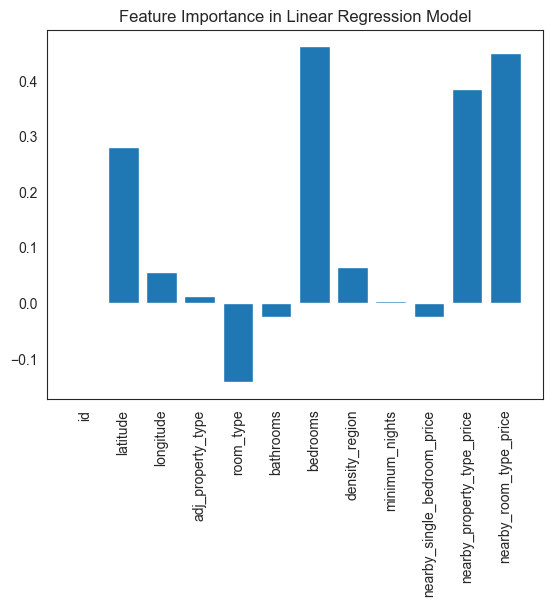

In [56]:
resultdict = {}
columns = X_test.columns
for i in range(len(columns)):
    resultdict[columns[i]] = lr_model.coef_[0,i]
    
plt.bar(resultdict.keys(),resultdict.values())
plt.xticks(rotation='vertical')
plt.title('Feature Importance in Linear Regression Model');

### Decision tree regressor

### Gradient Boost Regressor

Best max_depth is: 4 
Testing R^2 is: 0.6061271532410544


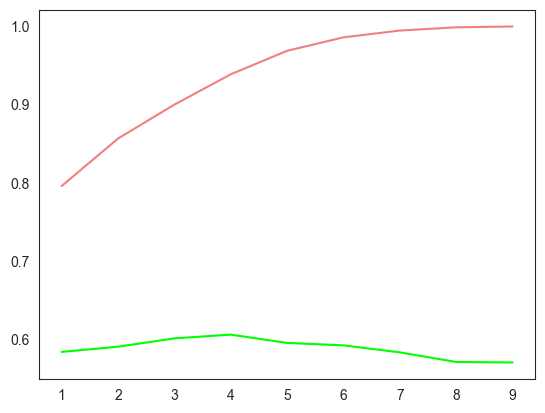

In [57]:
from sklearn.ensemble import GradientBoostingRegressor

train_score = []
test_score = []
max_score = 0
max_pair = (0,0)
for i in range(1,10):
    tree = GradientBoostingRegressor(max_depth=i,random_state=42, n_estimators=300)
    tree.fit(X_train,y_train_normed)
    y_pred_normed = tree.predict(X_test)
    train_score.append(tree.score(X_train,y_train_normed))
    test_score.append(r2_score(y_test_normed,y_pred_normed))
    test_pair = (i,r2_score(y_test_normed,y_pred_normed))
    if test_pair[1] > max_pair[1]:
        max_pair = test_pair

fig, ax = plt.subplots()
ax.plot(np.arange(1,10), train_score, label = "Training R^2",color='lightcoral')
ax.plot(np.arange(1,10), test_score, label = "Testing R^2",color='lime')
print(f'Best max_depth is: {max_pair[0]} \nTesting R^2 is: {max_pair[1]}')

In [58]:
from sklearn.ensemble import GradientBoostingRegressor


params = {
    "n_estimators": 300,
    "max_depth": max_pair[0],
    "random_state": 42
}

gb_model = GradientBoostingRegressor(**params)
gb_model.fit(X_train, y_train_normed)

GradientBoostingRegressor(max_depth=4, n_estimators=300, random_state=42)

In [59]:
y_pred_normed = gb_model.predict(X_test)


print('Linear Regression r2_score: ',round(r2_score(y_test_normed,y_pred_normed),2))
print('Linear Regression Root Mean Squared Error: ',round(np.sqrt(mean_squared_error(y_test_normed,y_pred_normed)),2))

y_test = scaler.inverse_transform(y_test_normed)
y_pred = scaler.inverse_transform(y_pred_normed.reshape(-1,1))

gb_difference = (y_pred - y_test)

print('\nLinear Regression predictions:')
print("Within $25: {}".format(len(gb_difference[(gb_difference <= 25) & (gb_difference >= -25)])))
print("Total:      {}".format(len(gb_difference)))
print("Percentage: {:.1f}%".format(len(gb_difference[(gb_difference <= 25) & (gb_difference >= -25)])/len(gb_difference)*100))

Linear Regression r2_score:  0.61
Linear Regression Root Mean Squared Error:  0.61

Linear Regression predictions:
Within $25: 530
Total:      1359
Percentage: 39.0%


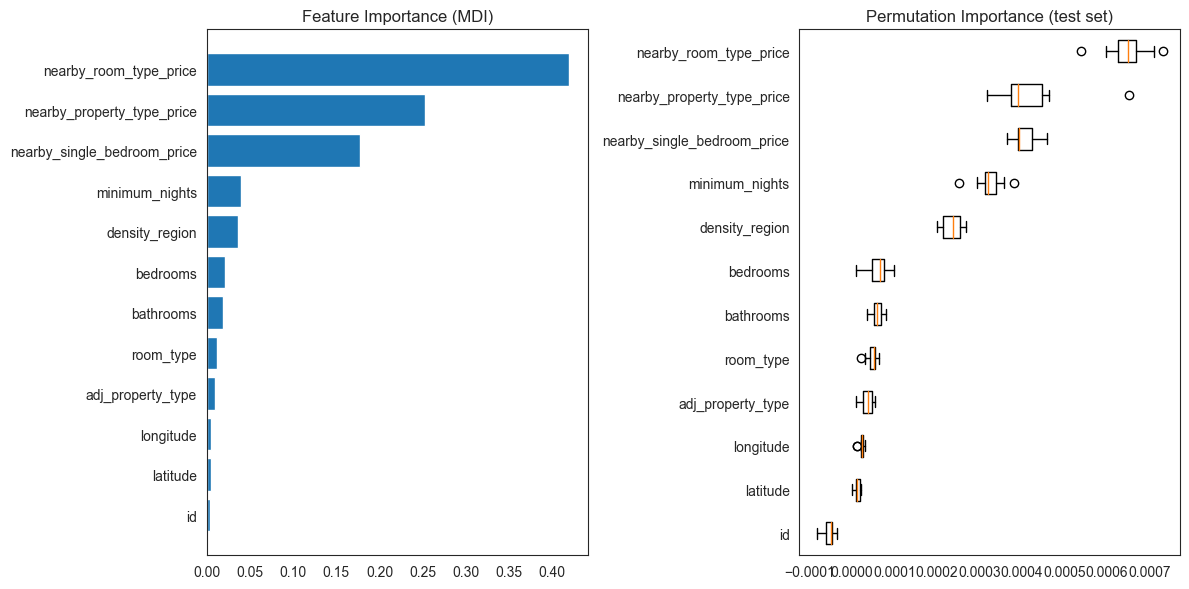

In [60]:
from sklearn.inspection import permutation_importance

feature_importance = gb_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, X_test.columns)
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    gb_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=X_test.columns,
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

Text(0.5, 1.0, 'Gradient Boost Regressor Feature Importance')

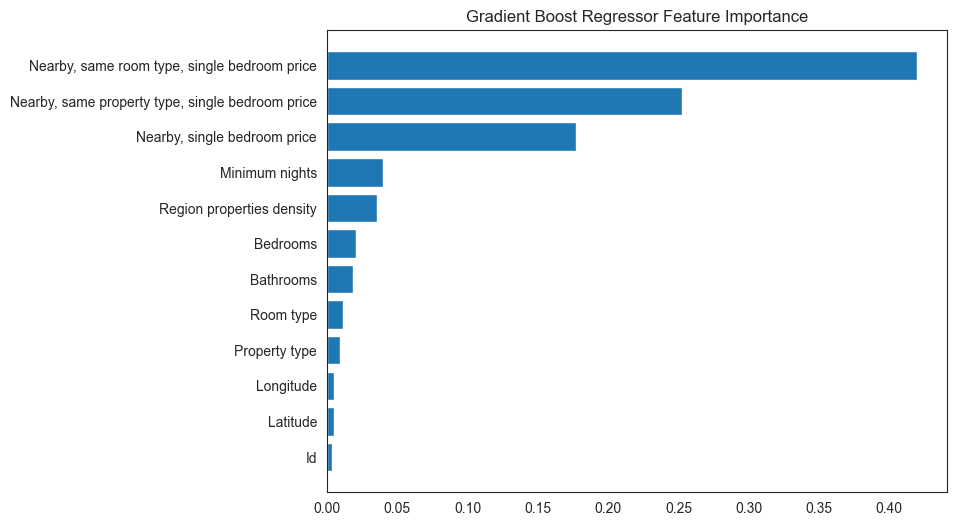

In [70]:
feature_importance = gb_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(8, 6))
plt.barh(pos, feature_importance[sorted_idx], align="center")
features_list = reversed(['Nearby, same room type, single bedroom price','Nearby, same property type, single bedroom price',
                'Nearby, single bedroom price', 'Minimum nights', 'Region properties density',
                'Bedrooms', 'Bathrooms', 'Room type', 'Property type', 'Longitude','Latitude','Id'])
plt.yticks(pos,features_list )
plt.title("Gradient Boost Regressor Feature Importance")

The R squared of the Linear Regression, and the Gradient Boosting Regressor model is 0.55 and 0.61, meaning the Gradient Boosting Regressor model fits the features better. 

The RMSE of the Linear Regression, and the Decision Tree Regression model is 0.65 and 0.61, meaning the Decision Tree Regression model has less error in predicting values.

### Evaluate by Business Criteria

The company wants to avoid prediction out of a range - more than \$25 off from the actual price. Therefore, we would consider using percentage of predictions which predicted price is not more than \$25 off from the actual price as a KPI to compare the two models again. The higher the percentage, the better the model performs. 39% of the decision tree regressor prediction is not more than $25 off from the actual rent price, while the linear regression model only have 36%.

## Recommendations


To help the user predict the price, we can deploy this GradientBoostingRegressor model into production. By implementing this model, about 39% of the users will be encouraged to rent the property. to better evaluate wither this model can really encourage more people to rent their property, I would also recommend A/B testing about using this model to compare two groups of users.

To implement and improve the model, I will consider the following steps:

The ideal way to deploy this model is to deploy as a web services in the home page of the website, so we can see the effects of the model on having new users renting properties on the platform. The calculator should lead to the registering page, auto-completing the fields filled before to make it as friction-less as possible.

Collecting more data, e.g. area, property age, electronics, internet, garage, demand and seasonality has a big impact on the rental prices for short stays. Some categories had just a single sample. Ideally, having several examples for each possible room_type x property_type combination would improve the predictions.

Feature Engineering, e.g reduce the categories in model, have several region mappings for each category to have a "region classification".

Improve the calculator by showing a price range according to the region variance instead of a single prediction, so the user can also have an idea of the price ranges in the region and use his own knowledge of intangible values such as brand, design and maintenance to set the price.

In [62]:
X_test.adj_property_type = labelencoder_property.inverse_transform(X_test.adj_property_type)
X_test.room_type = labelencoder_room.inverse_transform(X_test.room_type)

In [63]:
X_test['price'] = y_test
X_test['prediction'] = y_pred
X_test['difference'] = y_test - y_pred
X_test['outcome'] = np.abs(X_test['difference']) <= 25

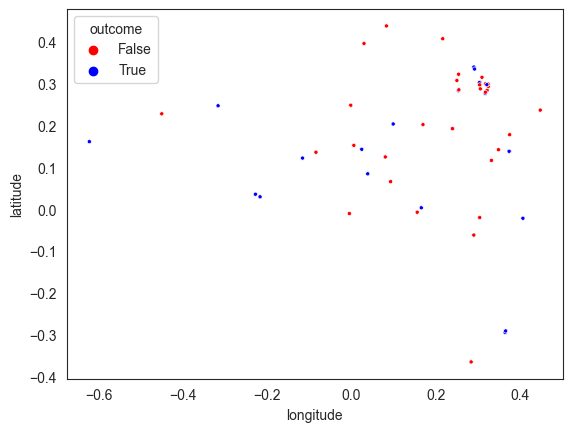

In [64]:
data_ = X_test[(X_test.bedrooms == 1) &
               (X_test.adj_property_type == 'Apartment') &
               (X_test.room_type == 'Private room') &
                   (X_test.minimum_nights == 1)]
ax = sns.scatterplot(data = data_,
                    x = 'longitude', 
                    y = 'latitude', 
                    hue='outcome',
                    marker = '.',
                    palette = ['r','b'])

In [65]:
X_test.pivot_table(index = 'adj_property_type', columns='room_type', values = 'id', aggfunc='count')

room_type,Entire home/apt,Hotel room,Private room,Shared room
adj_property_type,,,,
Apartment,204.0,NaN,142.0,1.0
Boutique hotel,4.0,13.0,80.0,NaN
Condominium,97.0,1.0,77.0,1.0
Guest suite,119.0,NaN,22.0,NaN
Hotel,9.0,16.0,38.0,1.0
House,179.0,NaN,272.0,3.0
Townhouse,28.0,9.0,32.0,11.0


In [66]:
rentals_df.latitude = (rentals_df.latitude/10)+latitude_mid
rentals_df.longitude = (rentals_df.longitude/10)+longitude_mid

X_test.latitude = (X_test.latitude/10)+latitude_mid
X_test.longitude = (X_test.longitude/10)+longitude_mid

Text(0.5, 1.0, 'Boutique hotel rooms in the same region\n 1 bedroom, 1 bathroom, 1 minimum nights')

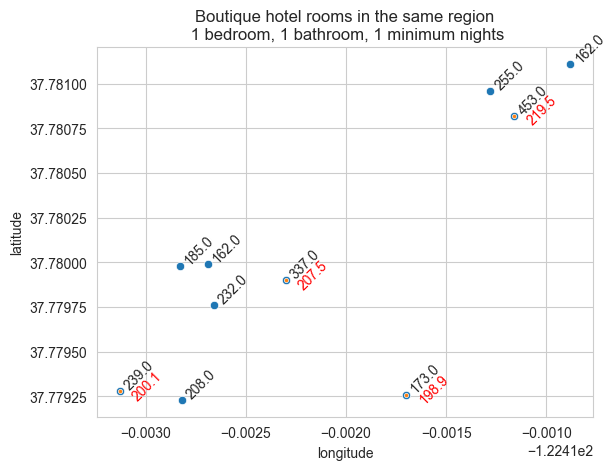

In [67]:
min_lat = 37.779
max_lat = 37.783
min_lon = -122.414
max_lon = -122.410

sns.set_style('whitegrid')
data_ = rentals_df[(rentals_df.bedrooms == 1) &
                   (rentals_df.bathrooms == 1) &
                   (rentals_df.adj_property_type == 'Boutique hotel') &
                   (rentals_df.room_type == 'Hotel room') &
                   (rentals_df.minimum_nights == 1) &
                   (rentals_df.latitude > min_lat) &
                   (rentals_df.latitude < max_lat) &
                   (rentals_df.longitude > min_lon) &
                   (rentals_df.longitude < max_lon)
                  ]
ax = sns.scatterplot(data = data_,
                    x = 'longitude', 
                    y = 'latitude', 
                    palette = "coolwarm")
for index, line in data_.iterrows():
     plt.text(line.longitude+0.00001, 
              line.latitude+0.00001, 
              line.price,
             rotation = 45)
        
data_ = X_test[(X_test.bedrooms == 1) &
               (X_test.adj_property_type == 'Boutique hotel') &
                   (X_test.room_type == 'Hotel room') &
                   (X_test.minimum_nights == 1) &
                   (X_test.latitude > min_lat) &
                   (X_test.latitude < max_lat) &
                   (X_test.longitude > min_lon) &
                   (X_test.longitude < max_lon)]
ax = sns.scatterplot(data = data_,
                    x = 'longitude', 
                    y = 'latitude', 
                    marker = '.',
                    palette = ['r','b'])

for index, line in data_.iterrows():
     plt.text(line.longitude+0.00005, 
              line.latitude-0.00005, 
              np.round(line.prediction,1),
              c = 'r',
             rotation = 45)
        
plt.title('Boutique hotel rooms in the same region\n 1 bedroom, 1 bathroom, 1 minimum nights')


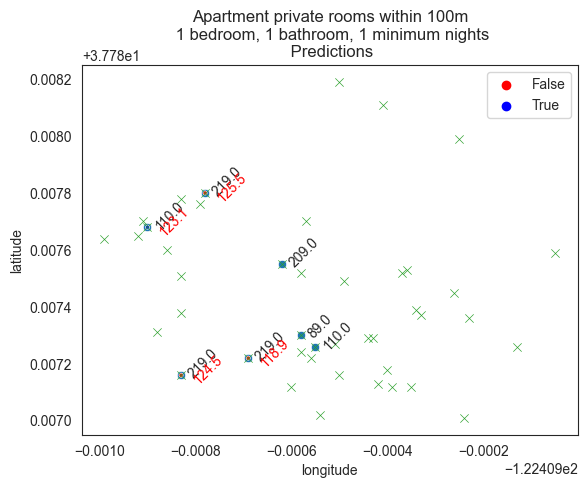

In [68]:
min_lat = 37.787
max_lat = 37.7882
min_lon = -122.410
max_lon = -122.409

sns.set_style('white')
data_ = rentals_df[(rentals_df.bedrooms == 1) &
                   (rentals_df.bathrooms == 1) &
                   (rentals_df.adj_property_type == 'Apartment') &
                   (rentals_df.room_type == 'Private room') &
                   (rentals_df.minimum_nights == 1) &
                   (rentals_df.latitude > min_lat) &
                   (rentals_df.latitude < max_lat) &
                   (rentals_df.longitude > min_lon) &
                   (rentals_df.longitude < max_lon)
                  ]
ax = sns.scatterplot(data = data_,
                    x = 'longitude', 
                    y = 'latitude', 
                    palette = "coolwarm")
for index, line in data_.iterrows():
     plt.text(line.longitude+0.00001, 
              line.latitude-0.00001, 
              line.price,
             rotation = 45)
        
data_ = X_test[(X_test.bedrooms == 1) &
               (X_test.adj_property_type == 'Apartment') &
                   (X_test.room_type == 'Private room') &
                   (X_test.minimum_nights == 1)&
                   (X_test.latitude > min_lat) &
                   (X_test.latitude < max_lat) &
                   (X_test.longitude > min_lon) &
                   (X_test.longitude < max_lon)]
ax = sns.scatterplot(data = data_,
                    x = 'longitude', 
                    y = 'latitude', 
                    marker = '.',
                     hue='outcome',
                    palette = ['r','b'])

for index, line in data_.iterrows():
     plt.text(line.longitude+0.00002, 
              line.latitude-0.00003, 
              np.round(line.prediction,1),
              c = 'r',
             rotation = 45)
        
plt.title('Apartment private rooms within 100m\n 1 bedroom, 1 bathroom, 1 minimum nights\n Predictions')
data_ = rentals_df[
                   (rentals_df.latitude > min_lat) &
                   (rentals_df.latitude < max_lat) &
                   (rentals_df.longitude > min_lon) &
                   (rentals_df.longitude < max_lon)
                  ]
ax = sns.scatterplot(data = data_,
                    x = 'longitude', 
                    y = 'latitude', 
                     marker = 'x')